# Pruebas de Hipotesis

##### Recordatorio

+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

* Donde k- Es la afirmacion a comprobar
* y Mu es la media de nuestra muestra

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Supusiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite

**3)**

Tamaño minimo de la muestra. (30)

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la z-test para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# p_value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$ No se rechaza hipotesis nula 
$$pvalue < umbral => H1$$ Se rechaza hipotesis nula

p_value = 0.06 > alpha = 0.05 # por tanto se no se rechaza hipotesis nula

p_value = 0.06 < alpha = 0.10 # se rechaza hipotesis nula

Se tiene por estandard que el grado e confianza pueden ser:

- Para el 90% confianza, alpha  es 0.1
- Para el 95% confianza, alpha  es 0.05
- Para el 99% confianza, alpha  es 0.01

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

In [13]:
print(len(x),len(y1))

120 120


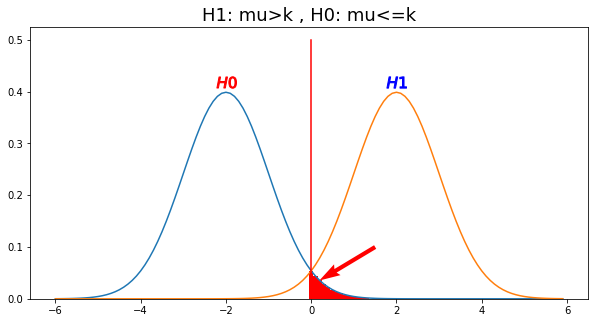

In [16]:
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        #plt.bar(x[i], y2[i], width=0.1, color='g')
        pass
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

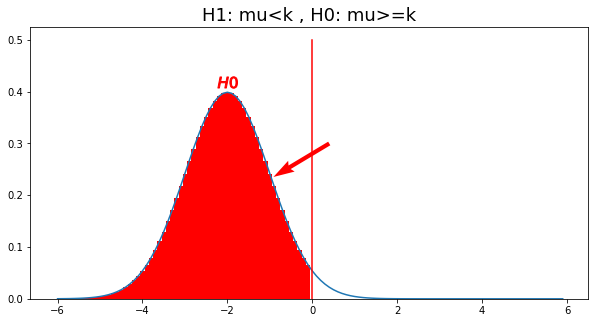

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
#plt.plot(x, y2)
#plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(0.4, 0.3, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        #plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

# Ejemplo Farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [20]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [21]:
help(sm.stats.ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [22]:
import random

In [31]:
help(random.uniform)

Help on method uniform in module random:

uniform(a, b) method of random.Random instance
    Get a random number in the range [a, b) or [a, b] depending on rounding.



In [76]:
m = []
for i in range(101): #numero de pacientes
    m.append(round(random.normalvariate(5.1, 1.6),1))

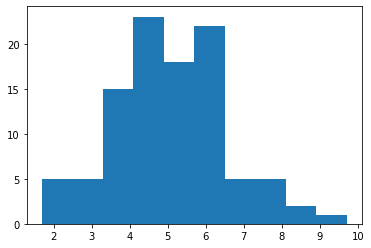

In [143]:
plt.hist(m)
plt.show();

In [78]:
sm.stats.ztest(m, value = 5.7, alternative = "smaller")
#regresa una tupla con el primer valor de t-test de las tablas, y el correspondiente de p_value

(-4.53518306508683, 2.8776771690881643e-06)

In [80]:
np.mean(m)

5.02970297029703

# Ejemplo Altura

Estudio media altura humana, 25 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0? con un 95% de confianza, alpha = 0.05

In [110]:
from scipy.stats import norm
n = norm.rvs(1.72,0.2,25)

In [111]:
n.std()

0.15643185687732664

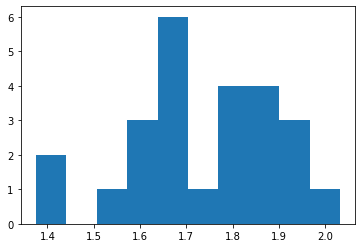

In [142]:
plt.hist(n, bins = 10)
plt.show();

In [112]:
from scipy.stats import ttest_1samp
test=ttest_1samp(n, 1.7)

test

Ttest_1sampResult(statistic=0.9853337225973241, pvalue=0.3342901698181123)

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

# Inidice masa corporal para los estado unidenses , mujeres y hombres
Se busca la diferencia entre ambas muestras

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

+ Hipotesis:
$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Con un 99% cofianza, alpha = 0.005 de cada lado, con un alpha de 0.01 completo

In [116]:
import pandas as pd

In [117]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [118]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [119]:
da['RIAGENDR'].unique()

array([1, 2], dtype=int64)

In [120]:
mujeres = da[da['RIAGENDR'] == 1]
hombres = da[da['RIAGENDR'] == 2]

In [122]:
n1 = len(mujeres)

In [123]:
n1 = len(mujeres)
media_m= mujeres['BMXBMI'].mean()
std_m = mujeres['BMXBMI'].std()

print(n1,media_m, std_m)

2759 28.778072111846942 6.2525676168014614


In [125]:
n2 = len(hombres)
media_h = hombres['BMXBMI'].mean()
std_h = hombres['BMXBMI'].std()

print(n2,media_h, std_h)

2976 29.93994565217392 7.753318809545674


In [158]:
results = sm.stats.ztest(mujeres['BMXBMI'].dropna(),hombres['BMXBMI'].dropna(), alternative = 'two-sided' )
#print(f'El p_value de la prueba anterior es de {round(results[1])}')
results

(-6.1755933531383205, 6.591544431126401e-10)

In [127]:
#Se rechaza o no se rechaza la hipotesis nula; de no hay diferencia entre las muestras

In [134]:
# Conclusion; como se tiene un p_value menor al grado de signficancia (alpha) entonces podemos rechazar H0

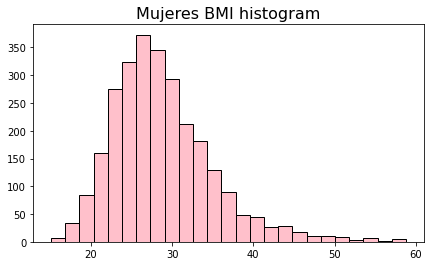

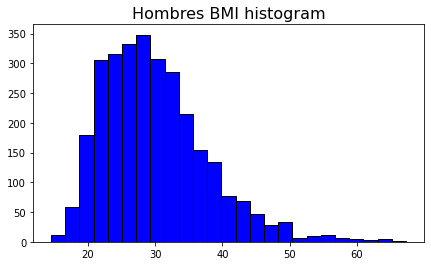

In [138]:
plt.figure(figsize=(7,4))
plt.title("Mujeres BMI histogram",fontsize=16)
plt.hist(mujeres["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Hombres BMI histogram",fontsize=16)
plt.hist(hombres["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show();

In [156]:
ttest_ind(mujeres['BMXBMI'].dropna(),hombres['BMXBMI'].dropna())

Ttest_indResult(statistic=-6.1755933531383205, pvalue=7.050275578094527e-10)

In [145]:
ab_test=pd.read_csv('data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [146]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

Al 90% de confianza con alpha = 0.1

In [148]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [150]:
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In [151]:
ttest_ind(ab_test.a, ab_test.a)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [155]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   